In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
df=df[df['day']<=2]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
1151450,53.6,0,6,2
1151451,53.8,0,6,2
1151452,53.1,0,6,2
1151453,53.0,0,6,2


In [4]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=50
    lag.append(make_data(df.loc[df['day']==i, ['original']], 'original', window))
    lag.append(df.loc[df['day']==i, ['day']])
    lag.append(make_label(df.loc[df['day']==i, ['label']], window))
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
df=pd.concat(df_list)
df=df.dropna().reset_index(drop=True)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,original_lag5,original_lag6,original_lag7,original_lag8,original_lag9,...,original_lag42,original_lag43,original_lag44,original_lag45,original_lag46,original_lag47,original_lag48,original_lag49,day,label
0,56.0,56.1,56.1,56.2,56.4,55.9,55.7,55.0,54.3,54.0,...,55.7,54.7,54.0,53.6,53.2,52.8,52.8,53.4,0,0
1,55.5,56.0,56.1,56.1,56.2,56.4,55.9,55.7,55.0,54.3,...,55.5,55.7,54.7,54.0,53.6,53.2,52.8,52.8,0,0
2,55.8,55.5,56.0,56.1,56.1,56.2,56.4,55.9,55.7,55.0,...,55.7,55.5,55.7,54.7,54.0,53.6,53.2,52.8,0,0
3,56.2,55.8,55.5,56.0,56.1,56.1,56.2,56.4,55.9,55.7,...,55.6,55.7,55.5,55.7,54.7,54.0,53.6,53.2,0,0
4,56.5,56.2,55.8,55.5,56.0,56.1,56.1,56.2,56.4,55.9,...,55.8,55.6,55.7,55.5,55.7,54.7,54.0,53.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151303,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,56.0,...,49.3,49.2,49.9,50.4,49.2,49.4,48.9,48.2,2,0
1151304,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,...,51.7,49.3,49.2,49.9,50.4,49.2,49.4,48.9,2,0
1151305,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,...,50.6,51.7,49.3,49.2,49.9,50.4,49.2,49.4,2,0
1151306,53.0,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,...,52.4,50.6,51.7,49.3,49.2,49.9,50.4,49.2,2,0


In [5]:
df_stats=[]
df_stats.append(df.mean(axis=1).rename('mean'))
df_stats.append(df.quantile(0.25, axis=1).rename('25%'))
df_stats.append(df.quantile(0.5, axis=1).rename('50%'))
df_stats.append(df.quantile(0.75, axis=1).rename('75%'))
# df_stats.append(df.skew(axis=1).rename('skew'))
# df_stats.append(df.kurt(axis=1).rename('kurt'))
# df_stats.append(df.round().mode(axis=1).dropna(axis=1).rename(columns={0:'mode'}))
# df_stats.append(df.max(axis=1).rename('max'))
data=pd.concat(df_stats, axis=1)
df=pd.concat([data, df['day'], df['label'], df['original']], axis=1)
df

,mean,25%,50%,75%,day,label,original
0,52.475000,53.875,54.30,55.275,0,0,56.0
1,52.515385,53.900,54.35,55.500,0,0,55.5
2,52.573077,53.900,54.45,55.525,0,0,55.8
3,52.638462,53.900,54.60,55.625,0,0,56.2
4,52.701923,53.975,54.70,55.700,0,0,56.5
...,...,...,...,...,...,...,...
1151303,52.084615,51.475,55.15,56.125,2,0,53.6
1151304,52.192308,51.650,55.15,56.125,2,0,53.8
1151305,52.273077,52.225,55.15,56.125,2,0,53.1
1151306,52.342308,52.850,55.15,56.125,2,0,53.0


In [12]:
test_day=[0]
train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-3]].values
test=df[(df['day'].isin(test_day))][df.columns[:-3]].values
train

array([[42.70961538, 44.2       , 44.3       , 44.6       ],
       [42.71730769, 44.2       , 44.35      , 44.6       ],
       [42.71538462, 44.2       , 44.35      , 44.6       ],
       ...,
       [52.27307692, 52.225     , 55.15      , 56.125     ],
       [52.34230769, 52.85      , 55.15      , 56.125     ],
       [52.38846154, 52.85      , 55.15      , 56.125     ]])

In [13]:
#マハラノビス
# nk = 1
# neigh = NearestNeighbors(n_neighbors=nk, metric='mahalanobis', 
#                         metric_params={'V':np.cov(train, rowvar=False)})
# neigh.fit(train)
# d = neigh.kneighbors(test)[0]

# d = np.mean(d, axis=1)
# mx = np.max(d)
# d = d / mx

In [14]:
nk = 1
neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]

d = np.mean(d, axis=1)
mx = np.max(d)
d = d / mx

In [15]:
test_for_plot=df.loc[df['day'].isin(test_day), 'original'].values
test_for_plot

array([56. , 55.5, 55.8, ..., 58.2, 58.8, 59.2])

In [16]:
data_unit=17999
num_ax=math.floor(len(test_for_plot)/data_unit)
label=df[(df['day'].isin(test_day))]['label'].values*100
label_index=range(len(label))
abnorm=(d*20)**2

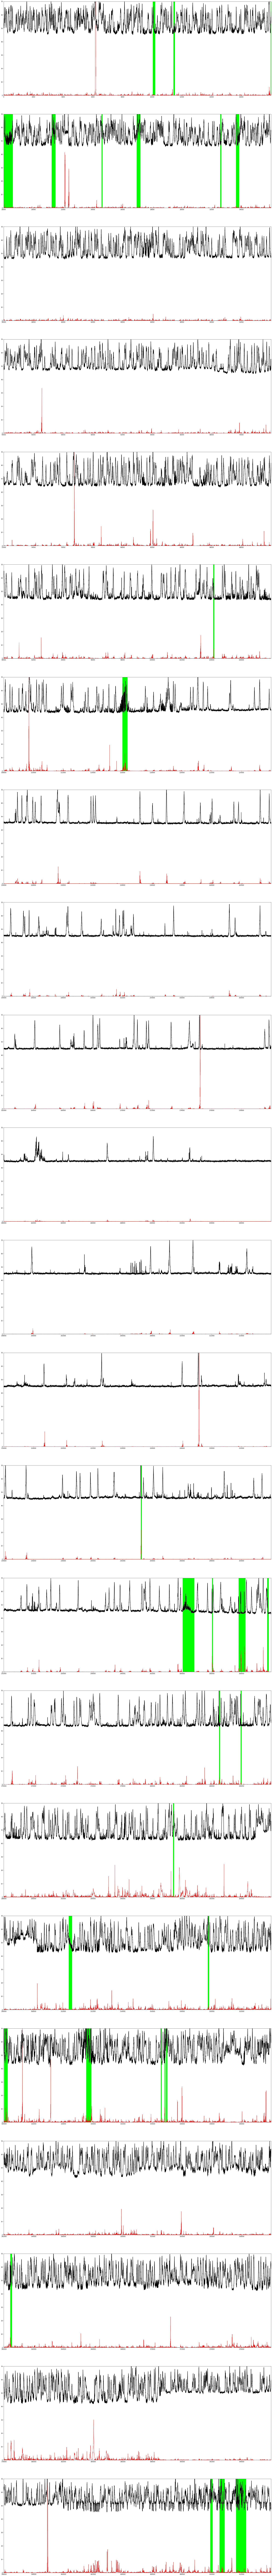

In [17]:
fig, ax=plt.subplots(num_ax, 1, figsize=(35, 15*num_ax))
data_unit=17999
for i in range(num_ax):
    ax[i].plot(abnorm, '-r',linewidth = 1 )
    ax[i].plot(test_for_plot, '-k',linewidth = 2)
    ax[i].fill_between(label_index, label, facecolor='lime' )
    ax[i].set_ylim(0, 70)
    ax[i].set_xlim(i*(data_unit), (data_unit)*(i+1))
plt.show()